In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import sklearn.linear_model as skit

In [47]:
def make_file_readable(filepath):
    try:
        f = open(filepath,"r")
        fileArray = f.readlines()
        return fileArray[1:]
    except:
        return None

print(make_file_readable("invest.txt"))

['1968 873.4 133.3 82.54 5.16\n', '1969 944 149.3 86.79 5.87\n', '1970 992.7 144.2 91.45 5.95\n', '1971 1077.6 166.4 96.01 4.88\n', '1972 1185.9 195 100 4.5\n', '1973 1326.4 229.8 105.75 6.44\n', '1974 1434.2 228.7 115.08 7.83\n', '1975 1549.2 206.1 125.79 6.25\n', '1976 1718 257.9 132.34 5.5\n', '1977 1918.3 324.1 140.05 5.46\n', '1978 2163.9 386.6 150.42 7.46\n', '1979 2417.8 423 163.42 10.28\n', '1980 2633.1 402.3 178.64 11.77\n', '1981 2937.7 471.5 195.51 13.42\n', '1982 3057.5 421.9 207.23 11.02\n']


In [48]:
dataFrame = pd.read_table("invest.txt",sep=" ")
dataFrame.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


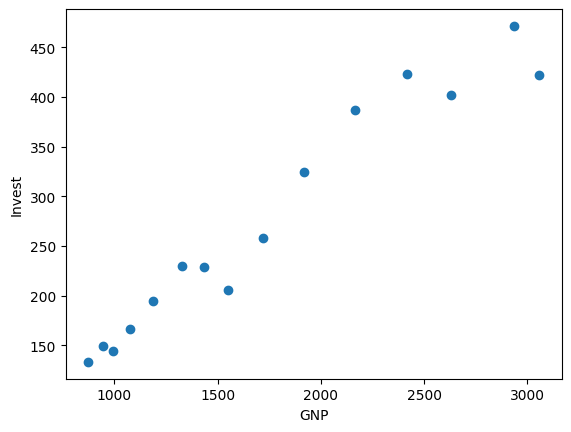

In [49]:
gnp = dataFrame['gnp']
invest = dataFrame['invest']

plt.scatter(gnp,invest)
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.show()

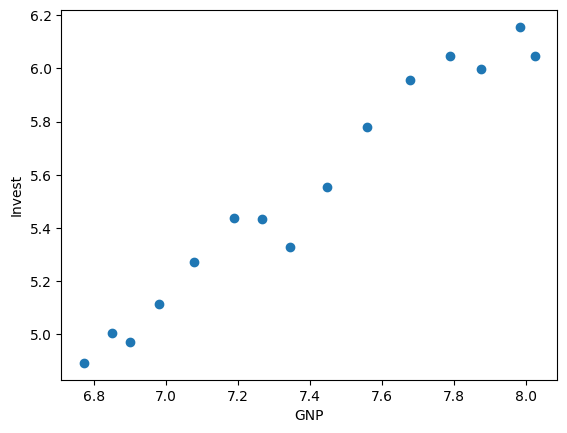

In [50]:
log_gnp = np.log(gnp)
log_invest = np.log(invest)

plt.scatter(log_gnp,log_invest)
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.show()

In [51]:
# Calculating the intercept and the slope of the function   
slopeEstimate = np.sum( (log_gnp-np.mean(log_gnp)) * (log_invest-np.mean(log_invest)) ) / np.sum( (log_gnp-np.mean(log_gnp))**2 )
interceptEstimate = np.mean(log_invest) - slopeEstimate*np.mean(log_gnp)

N = len(log_gnp)
empricalEcartType = (1/(N-2)) * np.sum( (log_invest - (interceptEstimate + slopeEstimate*log_gnp))**2 )

slopeDeviation = np.sqrt(empricalEcartType / np.sum( (log_gnp-np.mean(log_gnp))**2 ))
interceptDeviation = np.sqrt(  empricalEcartType *  ( (1/N) + (np.mean(log_gnp)**2) / np.sum((log_gnp-np.mean(log_gnp))**2) ) )

R_2 = 1 - (np.linalg.norm( (interceptEstimate + slopeEstimate*log_gnp) - log_invest)**2)/ np.linalg.norm(log_invest - np.mean(log_invest)*np.ones_like(log_invest))**2

print(f"The slope estimate is: {slopeEstimate}") 
print(f"The intercept estimate is: {interceptEstimate}")
print(f"Deviation of slop is: {slopeDeviation}")
print(f"Deviation of intercept is: {interceptDeviation}")
print(f"R_2 is: {R_2}")
    

The slope estimate is: 1.015281401598871
The intercept estimate is: -1.9635913352301815
Deviation of slop is: 0.05538306035485281
Deviation of intercept is: 0.4095472716623081
R_2 is: 0.9627572956057855


In [52]:
alpha = 0.05
studentDistribution = sp.t.ppf(1-alpha/2, df= N-2)
slopeTest = slopeEstimate / slopeDeviation
if  -studentDistribution <= slopeTest <= studentDistribution:
    print(f"the value of the slope in null")
else:
    print("the test failed, the slope is not null")

the test failed, the slope is not null


In [53]:
investementValue = interceptEstimate + slopeEstimate*np.log(1000)
alpha = 0.1
quantile_alpha = sp.t.ppf(1-alpha/2, df= N-2)


intervalBornesPositive = investementValue + quantile_alpha*np.sqrt(empricalEcartType*(1/N * (3-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 )) 
intervalBornesnegative = investementValue - quantile_alpha*np.sqrt(empricalEcartType*(1/N * ((3-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 )) )

intervalPredictionPositive = investementValue + quantile_alpha*np.sqrt(empricalEcartType*(1 + 1/N * (3-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 ))
intervalPredicitonNegative = investementValue + quantile_alpha*np.sqrt(empricalEcartType*(1 + 1/N * (3-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 ))

confidenceInterval = [intervalBornesnegative,intervalBornesPositive]
predicitonInterval = [intervalPredicitonNegative,intervalPredictionPositive]
print(confidenceInterval)
print(predicitonInterval)

[4.938715512195407, 5.160732740438196]
[5.197854279051739, 5.197854279051739]


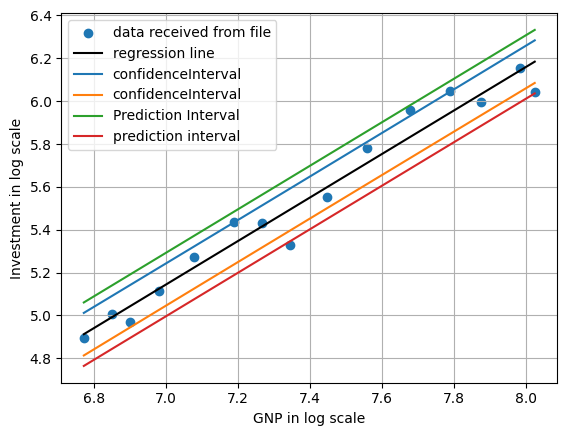

In [54]:
x_indexes = np.linspace(np.min(log_gnp),np.max(log_gnp),100)
regressionLine = interceptEstimate + slopeEstimate*x_indexes
predictedValues = interceptEstimate + slopeEstimate*log_gnp

plt.grid()
plt.xlabel("GNP in log scale")
plt.ylabel("Investment in log scale")
plt.scatter(log_gnp,log_invest,label="data received from file")
plt.plot(x_indexes,regressionLine,color='black',label="regression line")
plt.plot(log_gnp,predictedValues + quantile_alpha*np.sqrt(empricalEcartType*(1 + 1/N * (log_gnp-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 )),label="confidenceInterval")
plt.plot(log_gnp,predictedValues - quantile_alpha*np.sqrt(empricalEcartType*(1 + 1/N * (log_gnp-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 )),label="confidenceInterval")
plt.plot(log_gnp,predictedValues +  quantile_alpha*np.sqrt(empricalEcartType*(1 + 1/N * (3-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 )), label="Prediction Interval")
plt.plot(log_gnp,predictedValues -  quantile_alpha*np.sqrt(empricalEcartType*(1 + 1/N * (3-np.mean(log_gnp))**2) / np.sum( (log_gnp - np.mean(log_gnp))**2 )),label="prediction interval")
plt.legend()
plt.show()

In [55]:
regression = skit.LinearRegression()
gnpArray = np.array(log_gnp).reshape(-1,1)
investArray = np.array(log_invest).reshape(-1,1)
regression.fit(gnpArray,investArray)

print(regression.score(gnpArray,investArray))
print(regression.intercept_)
print(regression.coef_)
print(regression.predict([[np.log(1000)]]))

0.9627572956057855
[-1.96359134]
[[1.0152814]]
[[5.04972413]]


In [56]:
interest = dataFrame['interest']
X = np.array([np.ones(len(log_gnp)),log_gnp,interest]).T

Gram = X.T @ X
eigenvalues = np.linalg.eigvals(Gram)
if eigenvalues.all() > 10e-9:
    print(f"the Gram Matrix is invertible")
else:
    print(f"The Gram Matrix is not invertible")


the Gram Matrix is invertible


In [57]:
estimatorHat = np.linalg.inv(X.T @ X)@ (X.T) @ log_invest
interceptEstimate = estimatorHat[0]
slope1Estimate = estimatorHat[1]
slope2Estimate = estimatorHat[2]

print(f"the intercep is: {interceptEstimate}")
print(f"the slope 1 estimate is: {slope1Estimate}")
print(f"the slope 2 estimate is: {slope2Estimate}")

the intercep is: -2.1804547259139397
the slope 1 estimate is: 1.0512426913200048
the slope 2 estimate is: -0.006528879406112353


In [58]:
varianceEstimate = (1/(N-3)) * np.linalg.norm(log_invest - X @ estimatorHat)
varianceMatrix = varianceEstimate * np.linalg.inv(X.T @ X)

deviationIntercept = np.sqrt(varianceMatrix[0,0])
deviationslope1 = np.sqrt(varianceMatrix[1,1])
deviationslope2 = np.sqrt(varianceMatrix[2,2])

print(f"The deviation of the intercept is: {deviationIntercept}")
print(f"The deviaiton of the first slope is: {deviationslope1}")
print(f"The deviation of the second slope is: {deviationslope2}")

The deviation of the intercept is: 1.1829632753467756
The deviaiton of the first slope is: 0.1822690342624083
The deviation of the second slope is: 0.02740285788748759


In [59]:
alpha = 0.05
studentDistribution = sp.t.ppf(1-alpha/2, df= N-3)
interceptTest = interceptEstimate / interceptDeviation
slope1Test = slope1Estimate / deviationslope2
slope2Test = slope2Estimate / deviationslope2

print(f"the value of the intercept in null" if -studentDistribution<= interceptTest <= studentDistribution else f"The value of the intercept is non null ")
print(f"the value of the first slope in null" if -studentDistribution<= slope1Test <= studentDistribution else f"The value of the first slope is non null ")
print(f"the value of the second slope in null" if -studentDistribution<= slope2Estimate <= studentDistribution else f"The value of the second slope is non null ")

The value of the intercept is non null 
The value of the first slope is non null 
the value of the second slope in null


In [60]:
predictedGNP = np.log(interceptDeviation + slope1Estimate*np.log(1000) + slope2Estimate*10)

[array([-2.18045473,  1.05124269, -0.00652888])]


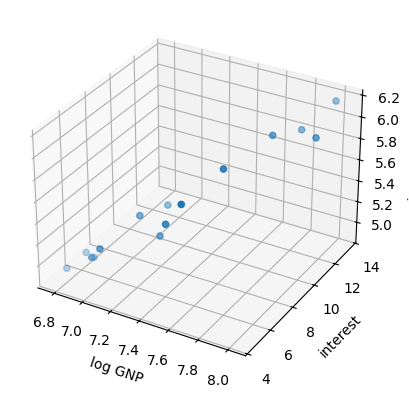

In [ ]:
Y_predicted = X @ estimatorHat
fig = plt.figure()

X1_grid,X2_grid = np.meshgrid(X[:,1],X[:,2])


ax = plt.axes(projection='3d')
ax.set_xlabel('log GNP')        
ax.set_ylabel('interest')
ax.set_zlabel('investment')
ax.scatter3D(log_gnp,interest,log_invest)
plt.show()